In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import configparser
import sys
import os
from mpi4py import MPI
from uvb_abun_pairwise_compare import *
import yt
import trident
import salsa
import scipy.integrate as sp

In [2]:
with open("/mnt/scratch/tairaeli/halo2392_pcw_2019/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    pcw_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_hm_2012/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    hm_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_fg_2009/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    fg_dat = pickle.load(salsa_dat)

In [3]:
pcw_v_hm = pcw_dat
pcw_v_hm["C II"]["HM_2012"] = hm_dat["C II"]["HM_2012"]
pcw_v_hm["C IV"]["HM_2012"] = hm_dat["C IV"]["HM_2012"]
pcw_v_hm["O VI"]["HM_2012"] = hm_dat["O VI"]["HM_2012"]

In [4]:
ion_list = ["C II", "C IV", "O VI"]
nrays = 4

pcw_v_hm_comp = pairwise_compare(pcw_v_hm, ion_list, nrays)

mx 15
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
id1 9
id2 9
id1 10
id2 10
id1 11
id2 11
id1 12
id2 12
id1 13
id2 13
id1 14
id2 13
mx 8
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 5
id2 6
id1 5
id2 7
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 4
id2 5
id1 4
id2 6
id1 4
id2 7
id1 4
id2 8
id1 4
id2 9
mx 6
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
mx 13
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 5
id1 7
id2 6
id1 8
id2 7
id1 9
id2 8
id1 10
id2 9
id1 11
id2 10
id1 12
id2 11
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 2
id2 3
id1 3
id2 4
id1 4
id2 5
id1 5
id2 6
id1 6
id2 7
id1 7
id2 8
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 4
id1 4
id2 5
id1 4
id2 6
id1 5
id2 8
id1 6
id2 9
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
mx 23

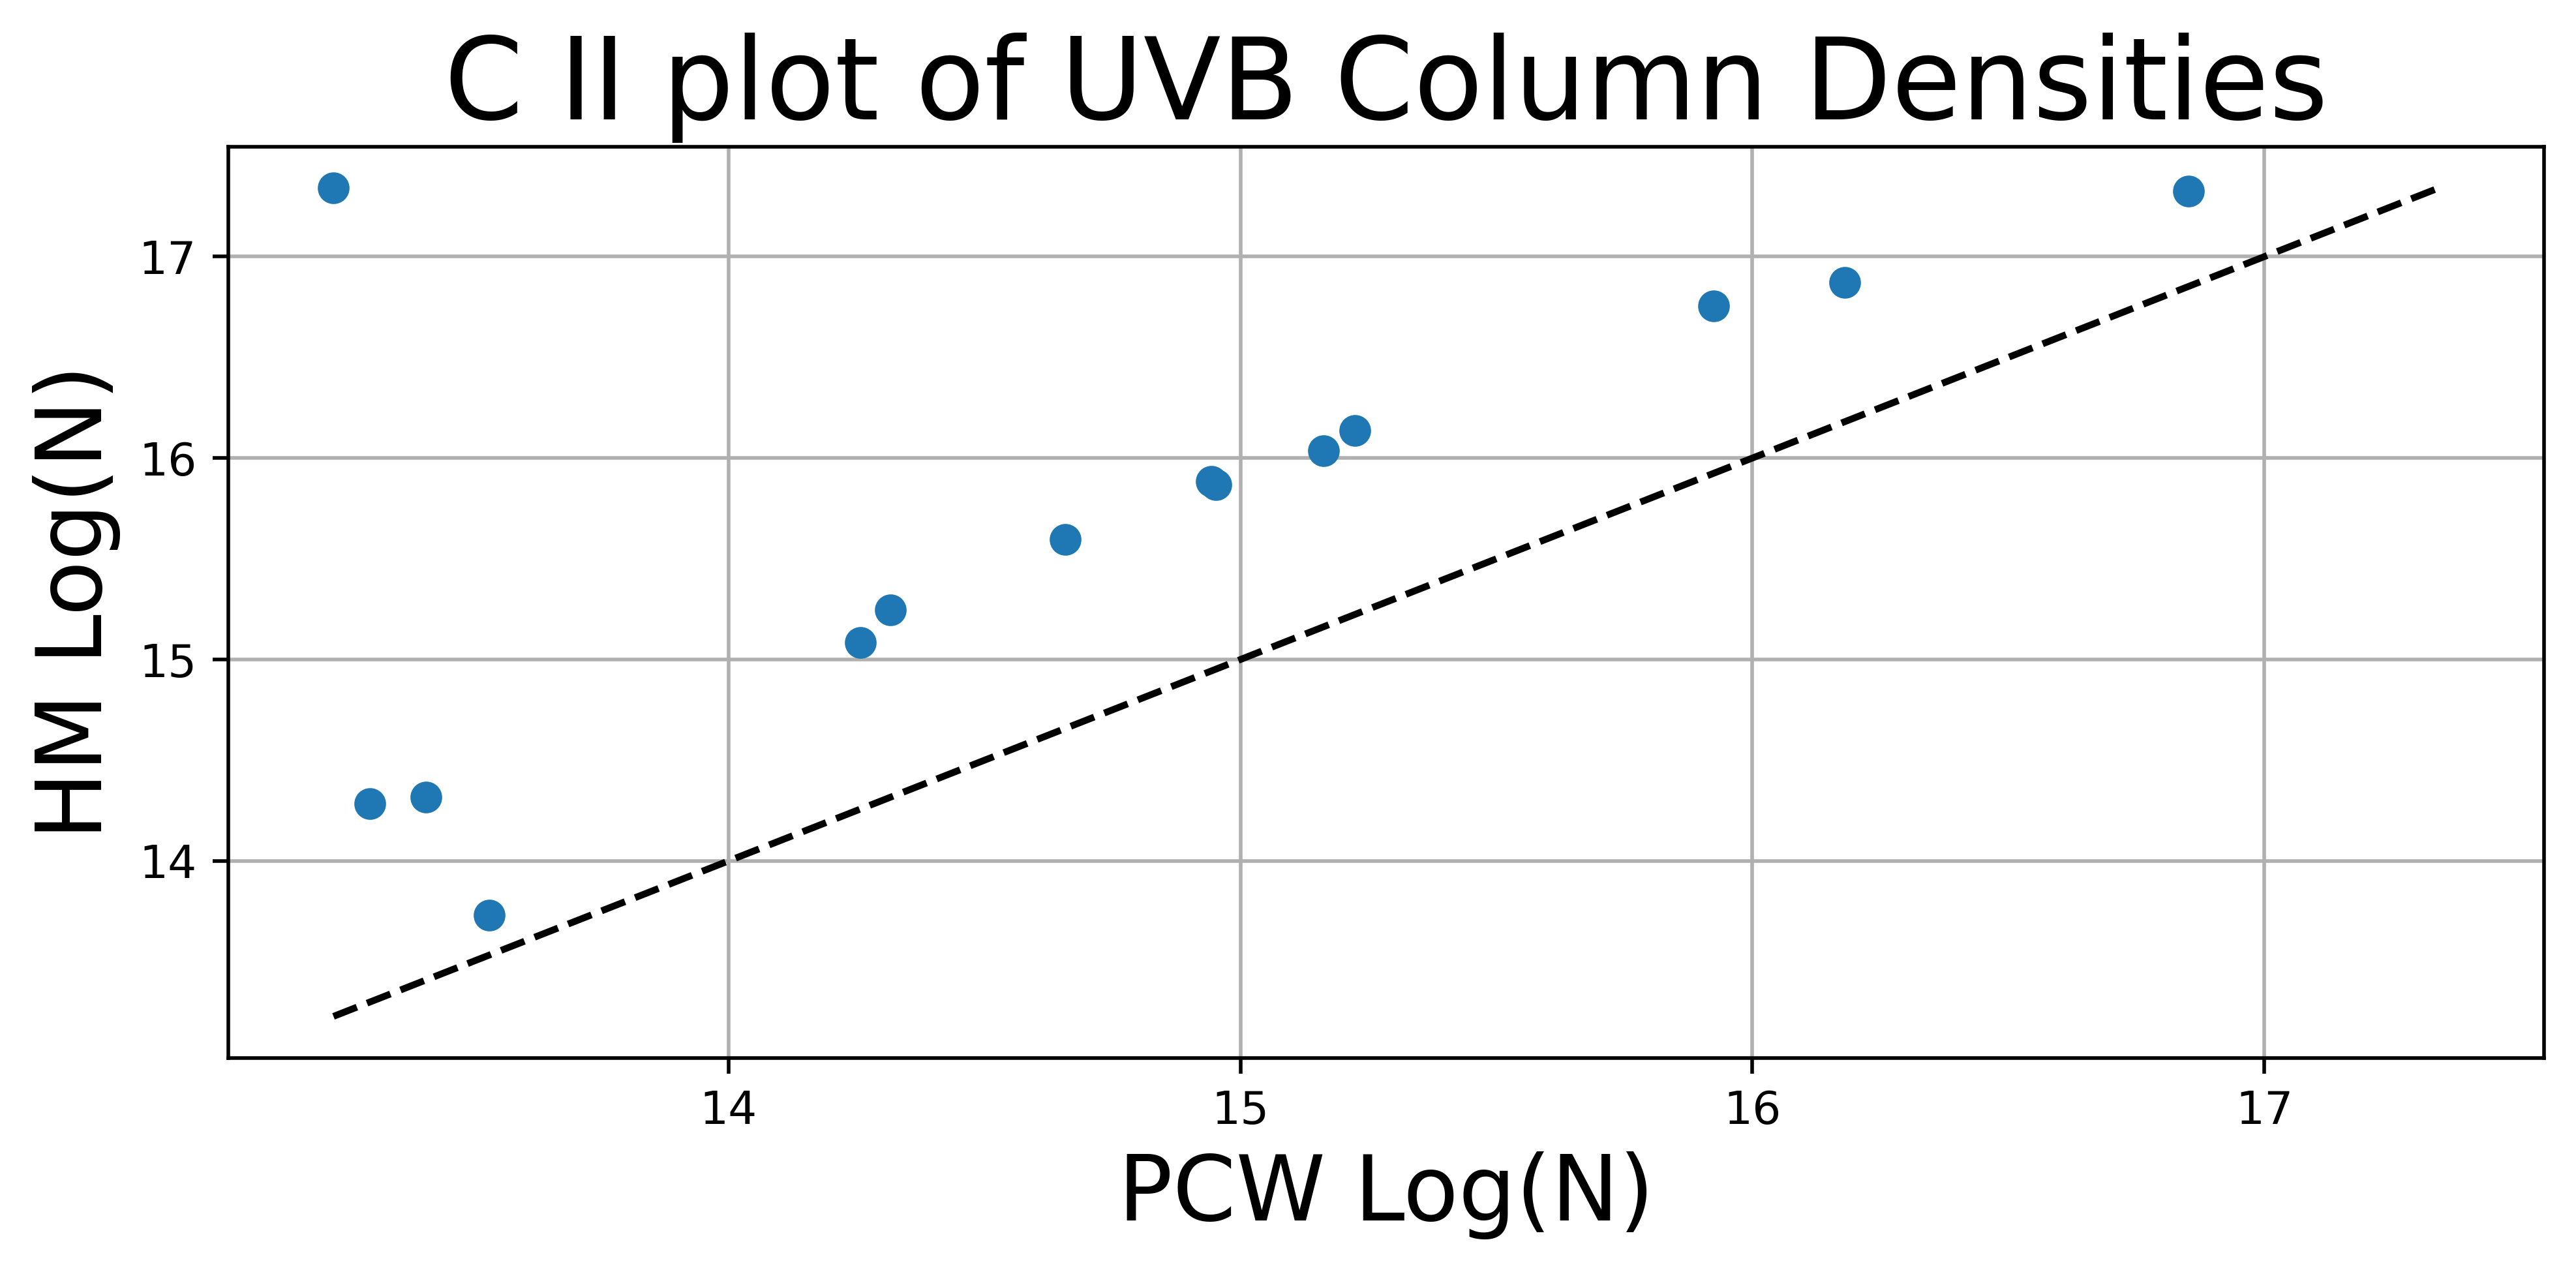

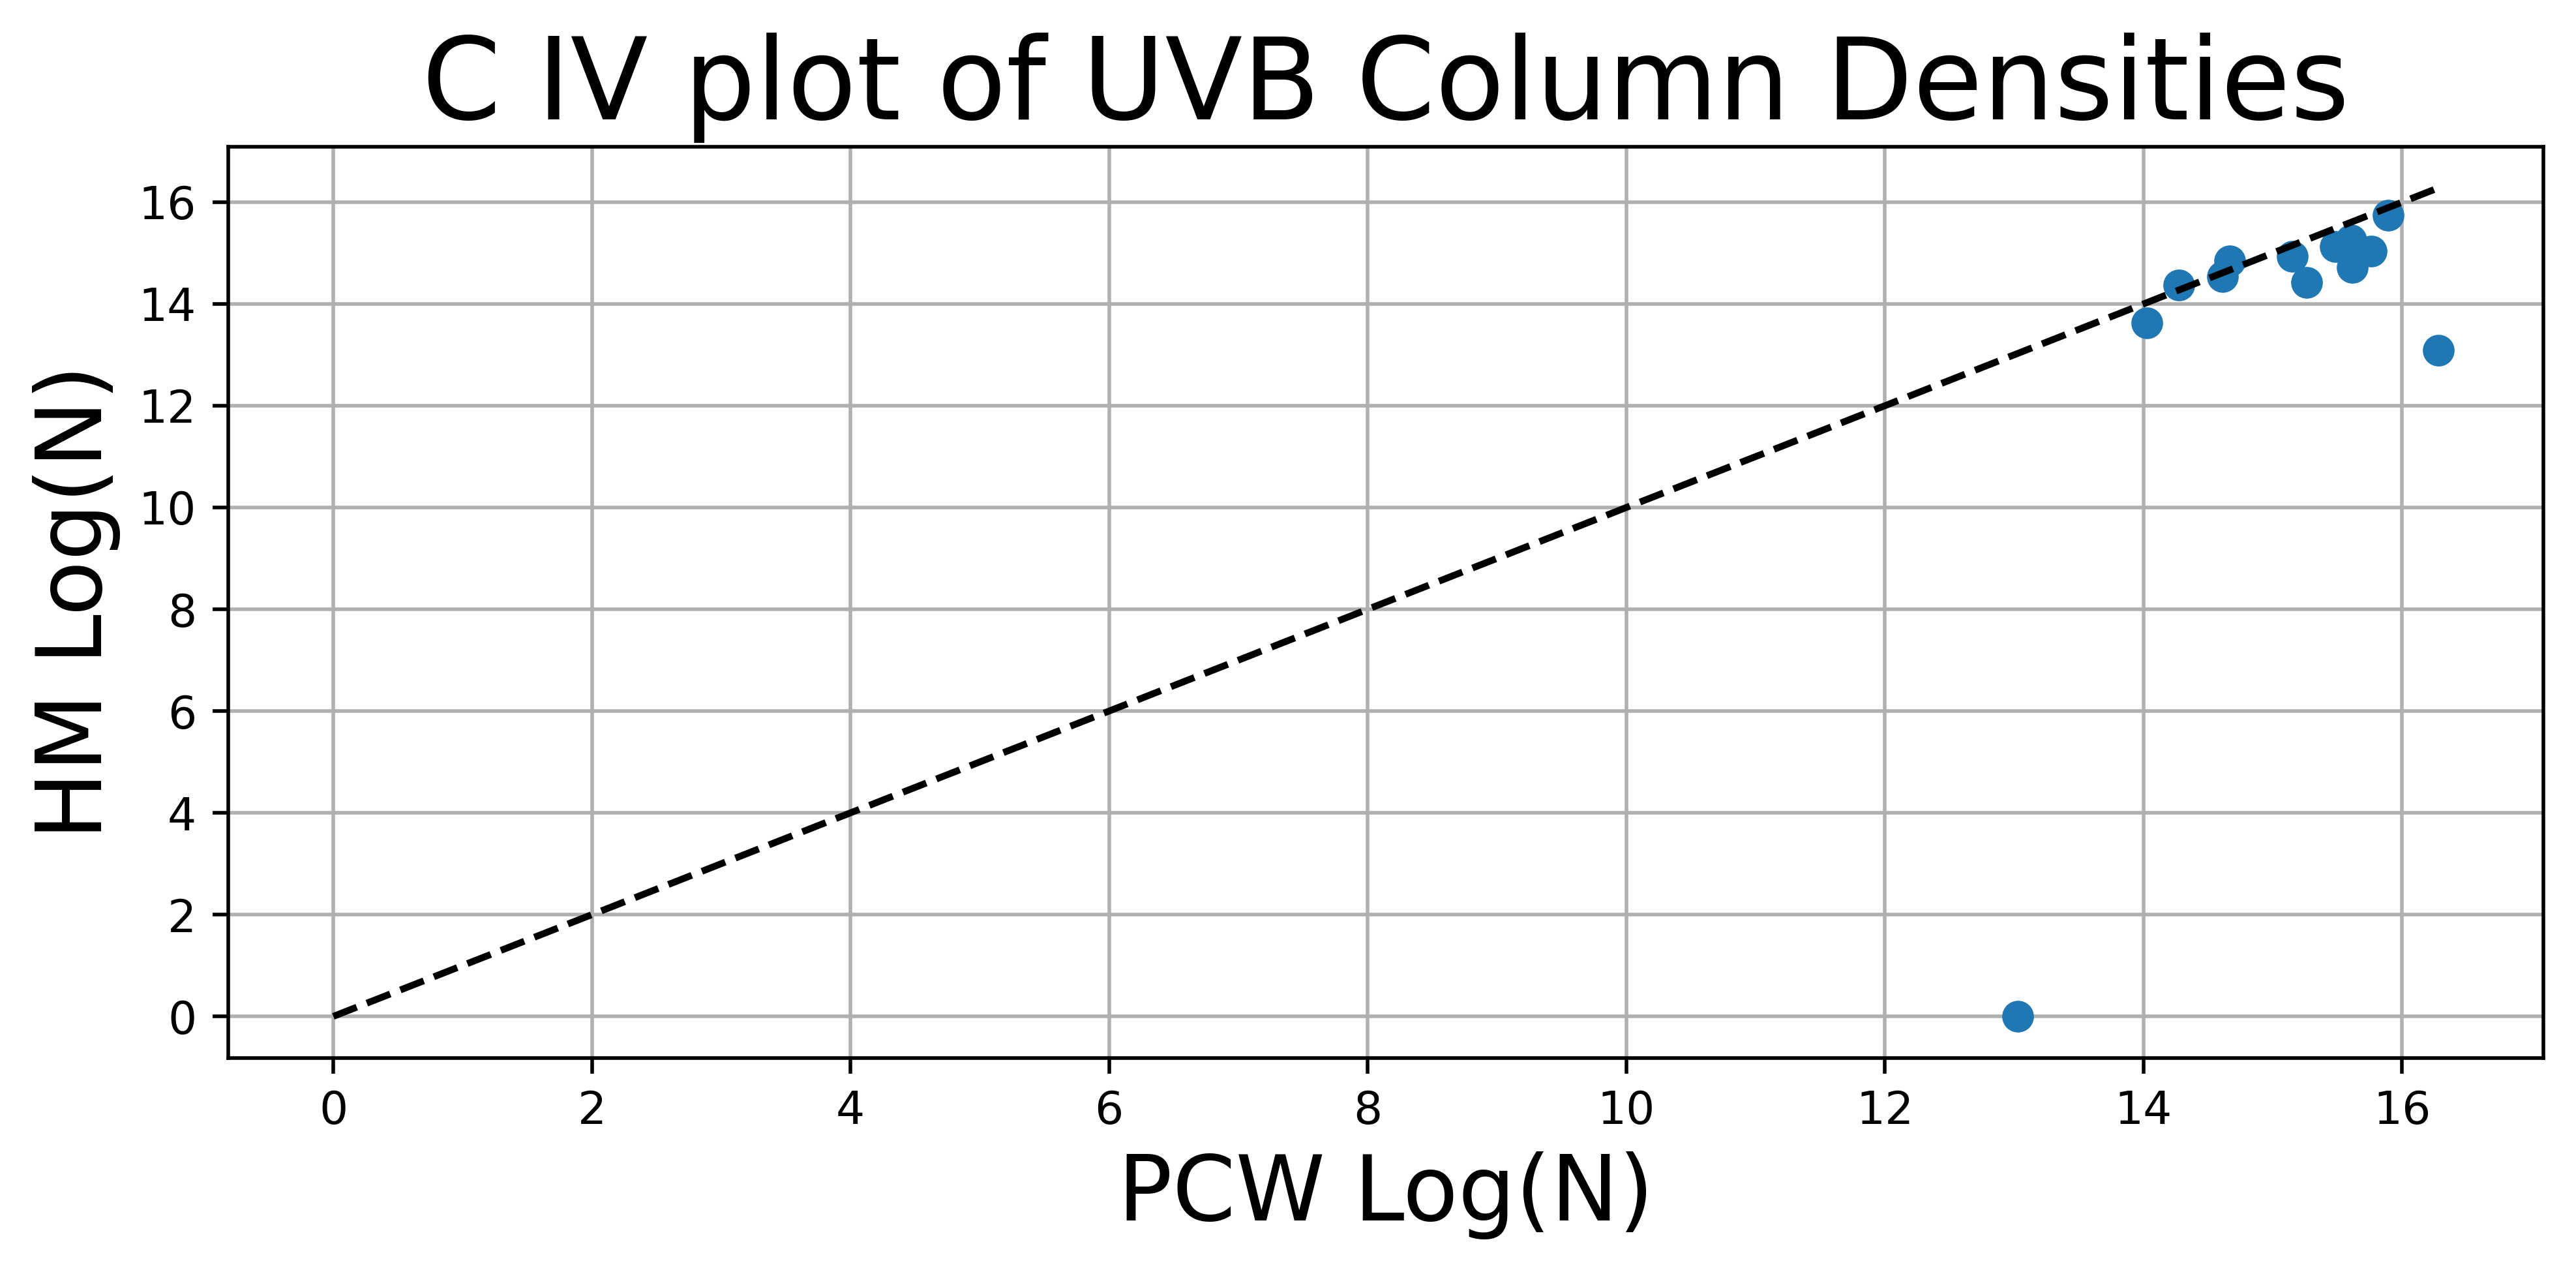

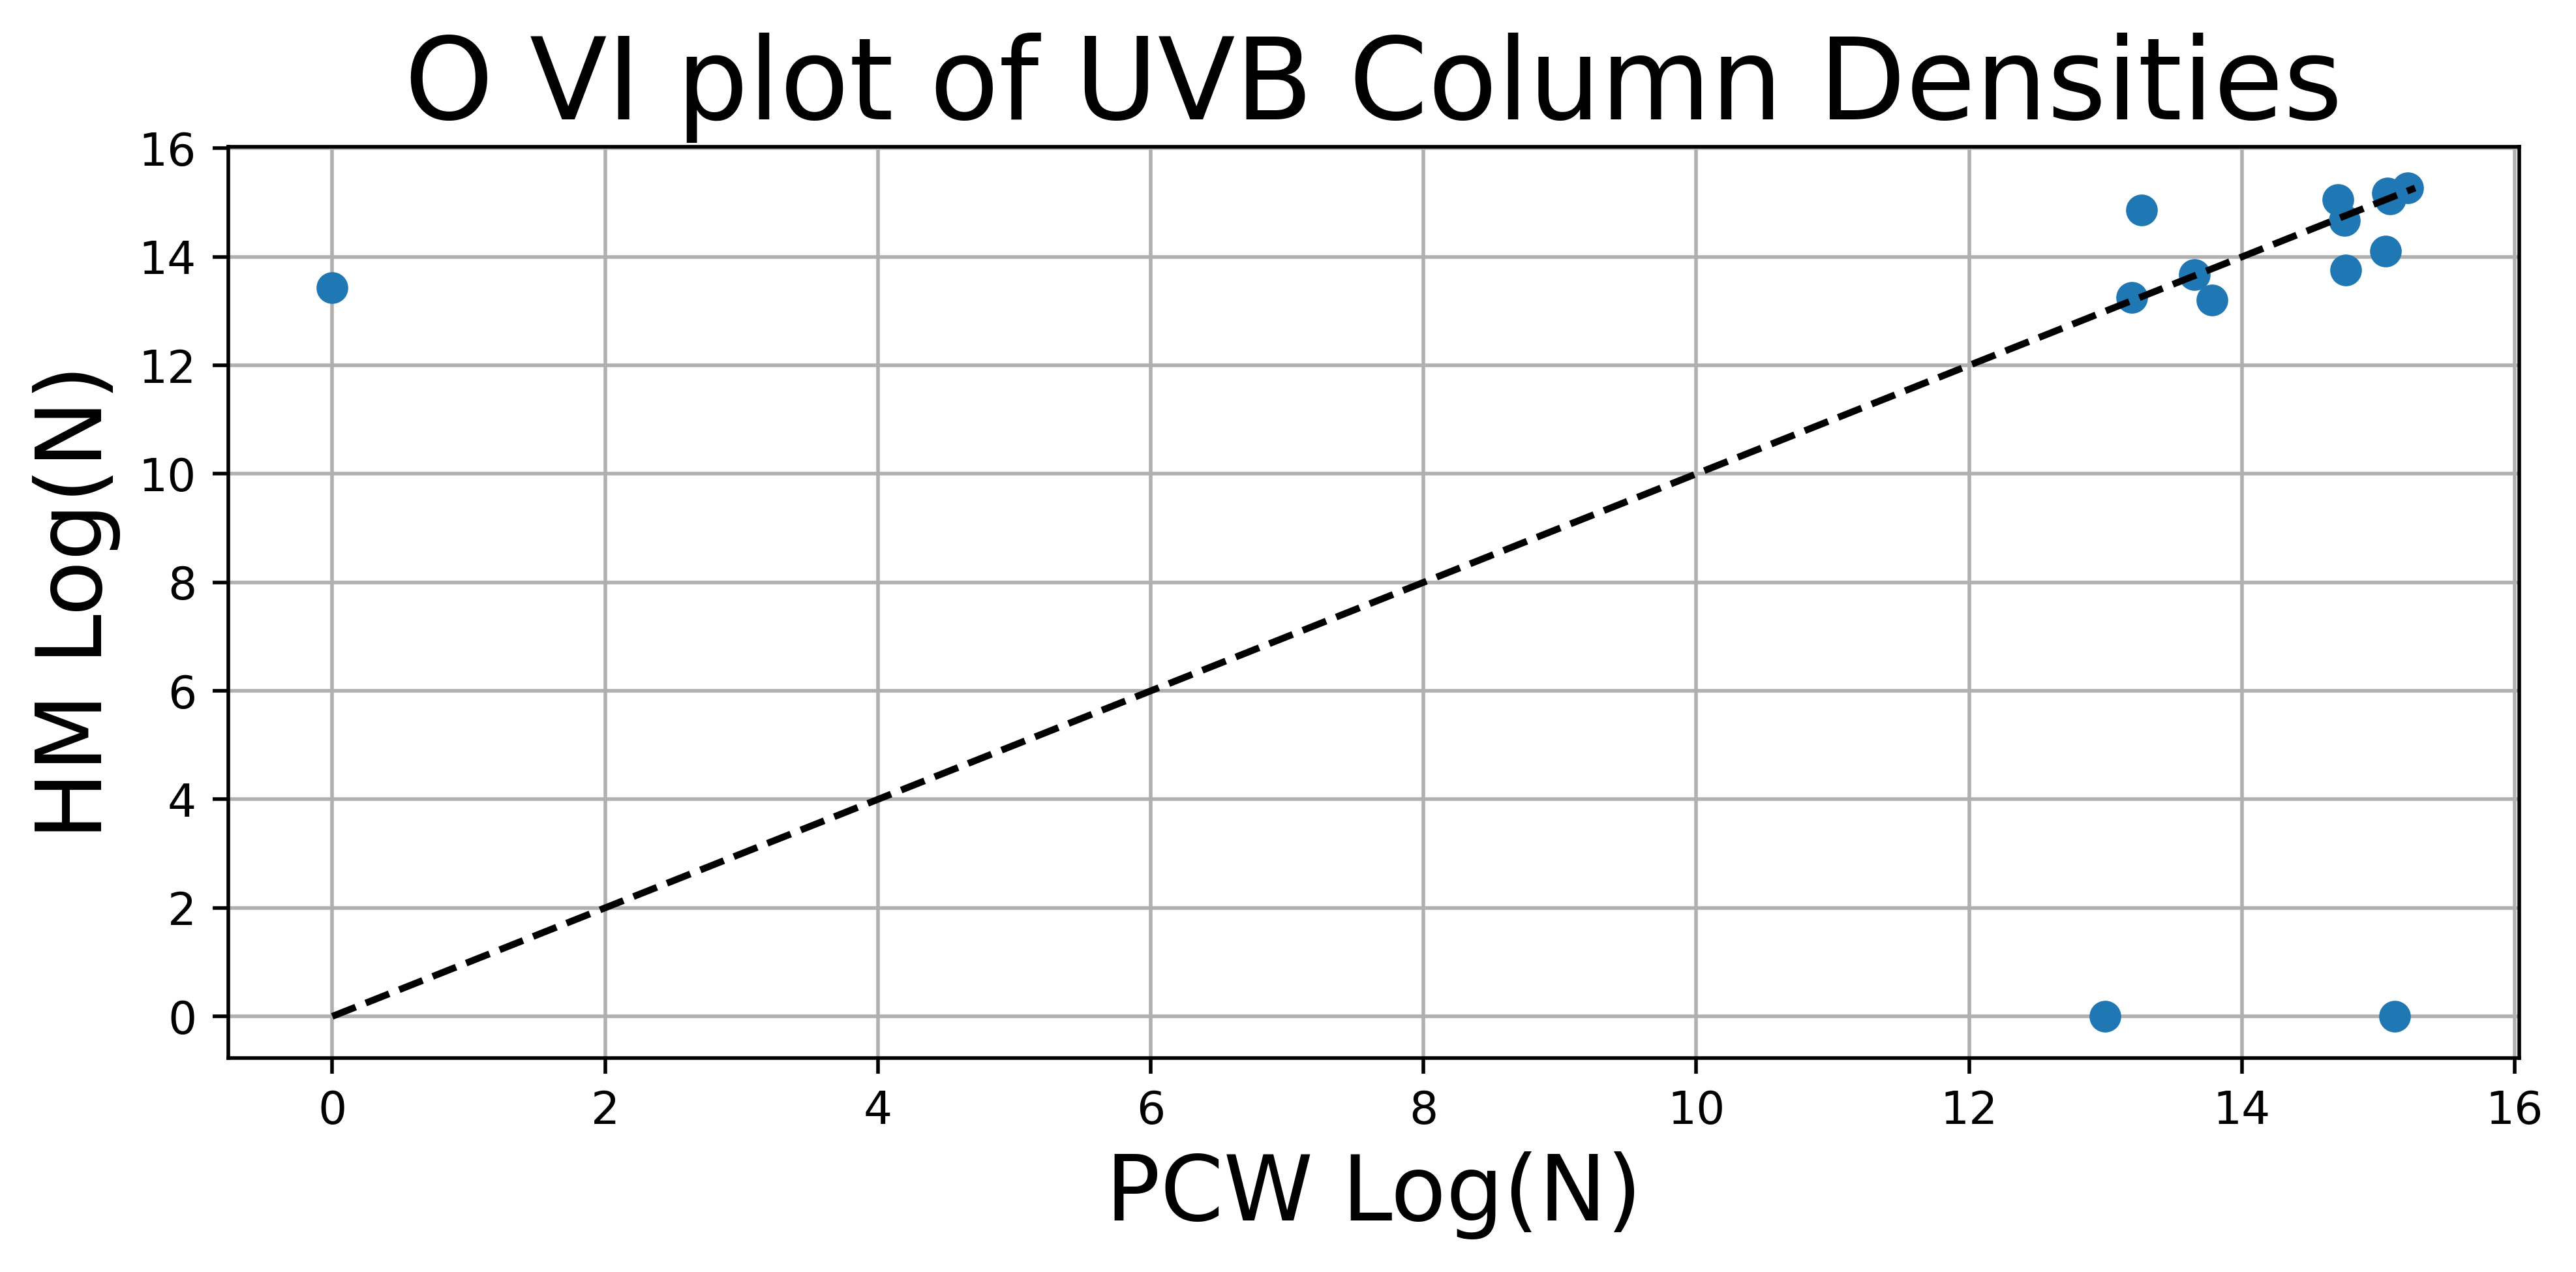

In [5]:
ray = 0

for i, ion in enumerate(ion_list):
    fig, ax = plt.subplots(1,1, figsize = [8,4],dpi = 500, facecolor = "white")
    pcw_dens = pcw_v_hm_comp[1][ion][ray]
    hm_dens = pcw_v_hm_comp[2][ion][ray]
    
    small_dens = np.min([pcw_dens, hm_dens])
    large_dens = np.max([pcw_dens, hm_dens])
    
    sim_line = np.linspace(small_dens, large_dens, 20)
    
    ax.plot(pcw_dens,hm_dens, "o")
    ax.plot(sim_line,sim_line, "--", color = "black")
    ax.set_xlabel("PCW Log(N)",fontsize = 20)
    ax.set_ylabel("HM Log(N)",fontsize = 20)
    ax.set_title(f"{ion} plot of UVB Column Densities",fontsize = 25)
    ax.grid()

    plt.tight_layout()
    name = ion.replace(" ","_")
    plt.savefig(f"col_dens_compare_{name}.svg",dpi= 500)

In [6]:
def compare_clump_dat(df_list,df_name_list,ion,ray):
    dens_list = []
    for i,df in enumerate(df_list):
        df_ion_ray = df[ion][df_name_list[i]][df[ion][df_name_list[i]]["lightray_index"] == str(ray)]

        df_clump_dens = np.zeros(df_ion_ray["interval_end"][len(df_ion_ray["col_dens"])-1])

        for iclump in range(len(df_ion_ray["col_dens"])-1):
            df_clump_dens[int(df_ion_ray["interval_start"][iclump]):int(df_ion_ray["interval_end"][iclump])]\
            = df_ion_ray["col_dens"][iclump]
        
        dens_list.append(df_clump_dens)
    
    return dens_list

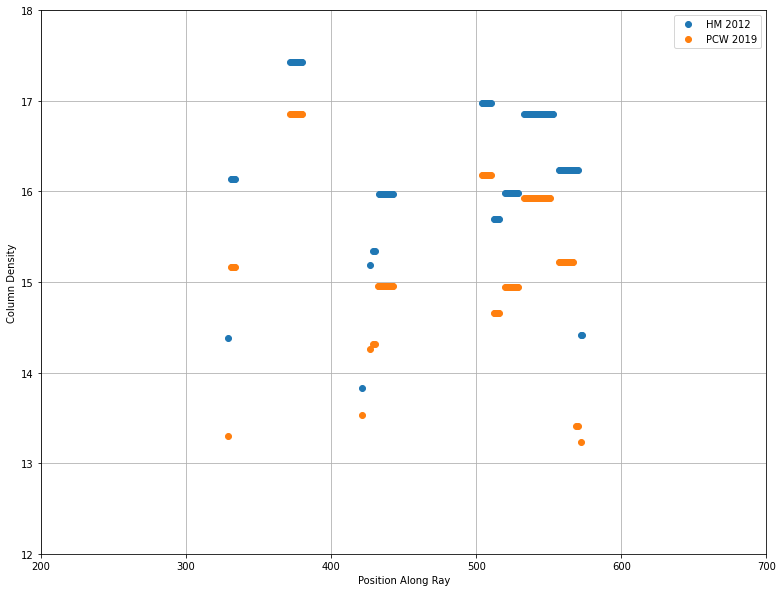

In [7]:
hm_dens,pcw_dens = compare_clump_dat([hm_dat,pcw_dat],["HM_2012","PCW_2019"],"C II",0)

plt.figure(figsize = [13,10])
plt.plot(hm_dens+0.1, label = "HM 2012", linestyle = "None", marker = "o")
plt.plot(pcw_dens, label = "PCW 2019", linestyle = "None", marker = "o")

plt.ylim(12,18)
plt.xlim(200,700)
plt.xlabel("Position Along Ray")
plt.ylabel("Column Density")
plt.grid()
plt.legend()

In [3]:
abun_path = "/mnt/home/tairaeli/trident_uncertainty/mods/abundances/scripts/abun_table.txt"

abundances = np.genfromtxt(abun_path,skip_header = 1)

abundances_ds = pd.read_csv(abun_path, delim_whitespace=True)

with open("/mnt/home/tairaeli/trident_uncertainty/mods/abundances/scripts/abun_table.txt") as f:
    elements = f.readline().strip().split(' ')

In [4]:
def get_true_rs(val): ##define how to get actual rshift numbers
    if val == 20:
        true_rs = '2.0'
    elif val == 18:
        true_rs = '2.5'
    return true_rs

In [5]:
sal_args = configparser.ConfigParser()
sal_args.read("./sal_params.par")

halo = sal_args["galaxy_settings"]["gal_pattern"]
rs = sal_args["galaxy_settings"]["redshift"]

halo_dat = yt.load(f'{sal_args["base_settings"]["halo_directory"]}/halo_00{halo}/nref11c_nref9f/RD00{rs}/RD00{rs}')
rs = sal_args["galaxy_settings"]["redshift"]

# gets the true rs needed
true_rs = get_true_rs(int(rs)) 

comm = MPI.COMM_WORLD

out_file = sal_args["base_settings"]["output_file"]
path = os.path.expandvars(os.path.expanduser(out_file))
halo_path = path+'/halo'+f'{halo}'
rs_path = halo_path + '/redshift'+f'{true_rs}'
ray_path = rs_path +'/rays'

nrays = 4
ray_list=[]
for i in range(nrays):
    if len(str(i)) != len(str(nrays)):
        n = len(str(nrays)) - 1
        
        ray_list.append(f'{ray_path}/ray{i: 0{n}d}.h5')
    else:
        ray_list.append(f'{ray_path}/ray{i}.h5')

ray_arr = np.array(ray_list)
ray_files_split = np.array_split(ray_arr, comm.size)
my_rays = ray_files_split[ comm.rank ]

yt : [INFO     ] 2023-05-23 15:04:56,741 Parameters: current_time              = 154.80100926529
yt : [INFO     ] 2023-05-23 15:04:56,743 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-05-23 15:04:56,746 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-05-23 15:04:56,748 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-05-23 15:04:56,751 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-05-23 15:04:56,753 Parameters: current_redshift          = 2
yt : [INFO     ] 2023-05-23 15:04:56,756 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-05-23 15:04:56,758 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-05-23 15:04:56,760 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-05-23 15:04:56,763 Parameters: hubble_constant           = 0.695


In [7]:
ray = 0
ion = "O VI"
atom,istate = ion.split(" ")

field_name = f"{atom}_p{trident.from_roman(istate)-1}_number_density"

abuns = dict(zip(elements, abundances[1]))

# uvb = "/mnt/home/tairaeli/trident_uncertainty/mods/abundances/data_bin/hm2012_ss_hr.h5"
uvb = "/mnt/home/tairaeli/trident_uncertainty/mods/abundances/data_bin/par_test.h5"
# uvb_name = "HM_2012"
uvb_name = "PCW_2019"

ray_dat = yt.load(f"/mnt/scratch/tairaeli/halo2392_pcw_2019/redshift2.0/rays/ray{ray}.h5")

trident.add_ion_number_density_field(atom, trident.from_roman(istate), 
                                     ray_dat, abundance_dict = abuns, 
                                     ionization_table = uvb)

dens = ray_dat.r[("gas",field_name)].copy()

ray_len_cm = 1.4799412858332495e+26
n_cells = len(dens)

ray_pos = np.linspace(0,ray_len_cm,n_cells)

# hm_pickle = open('./hm_dens.pickle',"wb")
# pickle.dump(dens, hm_pickle, protocol=3)
# hm_pickle.close()

yt : [INFO     ] 2023-05-23 15:05:17,011 Parameters: current_time              = 154.80100926529 code_time
yt : [INFO     ] 2023-05-23 15:05:17,014 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-05-23 15:05:17,017 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-05-23 15:05:17,019 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2023-05-23 15:05:17,022 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-05-23 15:05:17,024 Parameters: current_redshift          = 2
yt : [INFO     ] 2023-05-23 15:05:17,027 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-05-23 15:05:17,029 Parameters: omega_matter              = 0.285
yt : [ERROR    ] 2023-05-23 15:05:17,032 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-05-23 15:05:17,035 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2023-05-23 15:05:17,134 Allocating for 9.160e+02 particle

Buckle up bc we're about to get wRIGGITY WRIGGITY WRECKED SON


In [12]:
ray_dat.domain_width.to("cm")[0]

1.4799412858332495e+26 cm

/mnt/home/tairaeli/.local/lib/python3.6/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


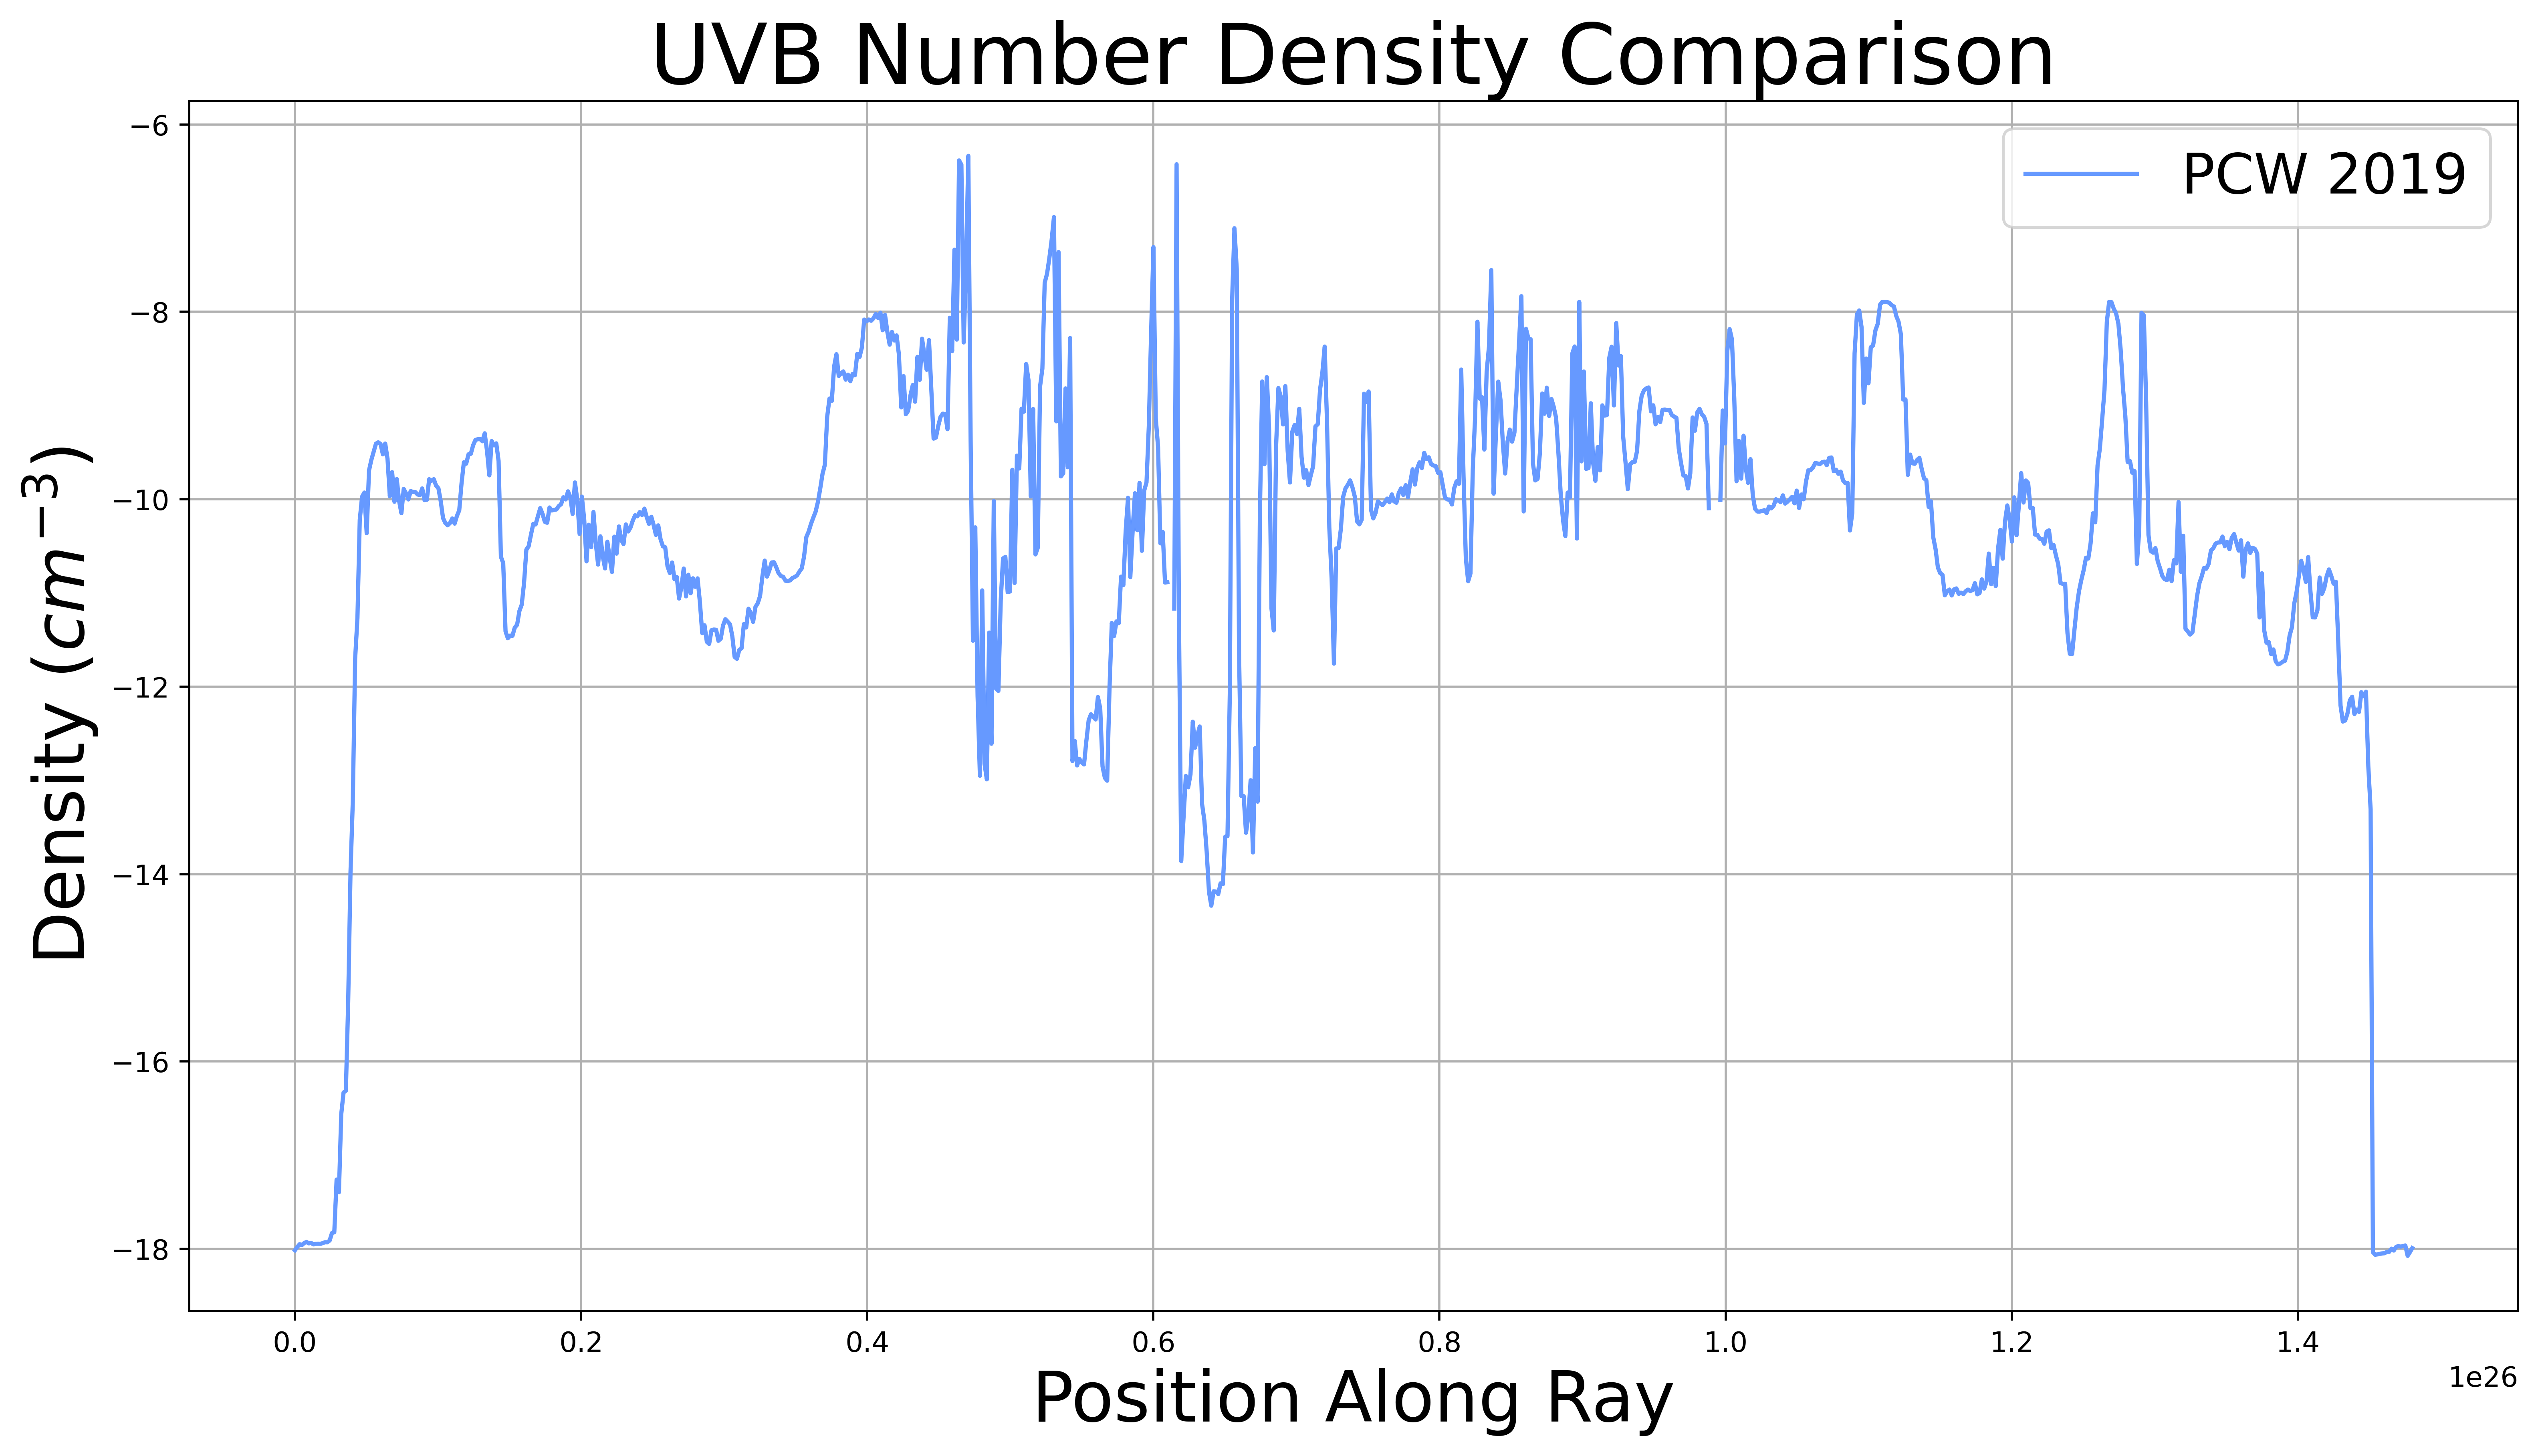

In [13]:
plt.figure(figsize = [15,8], dpi = 500, facecolor = "white")
colors = plt.cm.cool([0.3,0.4,0.9,1])
plt.plot(ray_pos,np.log10(dens),label = "PCW 2019", color = colors[1])
plt.grid()
plt.legend(fontsize = 20)
# plt.ylim(10**(-15),10**(-6.5))
# plt.xlim(500,900)
plt.xlabel("Position Along Ray", fontsize = 25)
plt.ylabel(r"Density ($cm^{-3}$)", fontsize = 25)
plt.title(f"UVB Number Density Comparison", fontsize = 30)
plt.savefig(f"uvb_compare_{ion}.svg",dpi = 500)

In [14]:
with open("hm_dens.pickle","rb") as file:
    hm_dens = pickle.load(file)

In [ ]:
colors = plt.cm.cool([0.3,0.4,0.9,1])

plt.figure(figsize = [15,8], dpi = 500, facecolor = "white")
plt.semilogy(hm_dens,label = "HM 2012", color = colors[3])
plt.semilogy(dens,label = "PCW 2019", color = colors[1])
# plt.axhline(1e-13)

hm_clumps = hm_dat[ion]["HM_2012"][hm_dat[ion]["HM_2012"]["lightray_index"] == str(ray)]
pcw_clumps = pcw_dat[ion]["PCW_2019"][pcw_dat[ion]["PCW_2019"]["lightray_index"] == str(ray)]

i = 0
for i in range(len(hm_clumps["interval_start"])):
    
    lb = hm_clumps["interval_start"][i]
    hb = hm_clumps["interval_end"][i]
    
    rng = [lb,hb]
    
    yb = hm_dens[slice(*rng)]
    xb = np.arange(*rng)
    
    plt.fill_between(xb,yb, color = colors[2], alpha = 0.3)

for i in range(len(pcw_clumps["interval_start"])):
    
    lb = pcw_clumps["interval_start"][i]
    hb = pcw_clumps["interval_end"][i]
    
    rng = [lb,hb]
    
    yb = dens[slice(*rng)]
    xb = np.arange(*rng)
    
    plt.fill_between(xb,yb, color = colors[0], alpha = 0.3)    

plt.grid()
plt.legend(fontsize = 20)
# plt.ylim(10**(-15),10**(-6.5))
# plt.xlim(500,900)
plt.xlabel("Position Along Ray", fontsize = 25)
plt.ylabel(r"Density ($cm^{-3}$)", fontsize = 25)
plt.title(f"UVB Number Density Comparison", fontsize = 30)
# plt.savefig(f"uvb_compare_{ion}.svg",dpi = 500)

Text(0.5, 1.0, 'UVB Number Density Comparison')

In [ ]:
print(hm_clumps["interval_end"][len(hm_clumps["density"])-1])
print(pcw_clumps["interval_start"][len(pcw_clumps["density"])-1])

In [ ]:
start = 866
end = 883

dx = ray_pos[1] - ray_pos[0]

def dens_finder(start,end, density, dx):
    
    target_clump = density[start:end]
    
    return sp.simps(target_clump,dx = dx)

hm_clump_num = dens_finder(866,883,hm_dens,dx)

pcw_clump_num = dens_finder(866,883,dens,dx)

print(hm_clump_num)
print(pcw_clump_num)

In [ ]:
colors = plt.cm.cool([0.3,0.4,0.9,1])

plt.figure(figsize = [15,8], facecolor = "white")

plt.semilogy(hm_dens[860:885],label = "HM 2012", color = colors[3])
plt.semilogy(dens[860:885],label = "PCW 2019", color = colors[1])

# plt.xlim(860,885)

In [ ]:
# loading in data on other fields 
field_items = sal_args["galaxy_settings"]["field_items"].split(" ")
field_types = sal_args["galaxy_settings"]["field_types"].split(" ")
units = sal_args["galaxy_settings"]["field_units"].split(" ")

assert len(field_items) == len(field_types), f"Number of field items ({field_items}) do not match their labels ({field_types})"
assert len(field_items) == len(units), f"Number of field items ({field_items}) do not match their units ({units})"
other_fields = []
field_units = {}
# constructing field list to put into SALSA
for i, item in enumerate(field_items):
    
    if field_types[i] == "NA":
        field_tup = item
    else:
        field_tup = (field_types[i],item)
        
    other_fields.append(field_tup)
    
    if units[i] == "NA":
        continue
    else:
        field_units[f"{item}"] = units[i]

print(other_fields)

In [ ]:
field_units.items()


In [ ]:
# abundances_ds = abundances_ds.iloc[0].to_dict()

# abs_ext = salsa.AbsorberExtractor(halo_dat, ray_dat, ion_name = ion, 
#                                   velocity_res =20, 
#                                   abundance_table = abundances_ds, 
#                                   calc_missing=True)
            
# df = salsa.get_absorbers(abs_ext, my_rays, method='spice', 
#                          fields=other_fields, 
#                          units_dict=field_units).drop(columns='index')

In [ ]:
# generating histogram plots
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

uvb_names = ["PCW_2019","HM_2012","FG_2009"]
uvb_list = [pcw_dat, hm_dat, fg_dat]

for i, ion in enumerate(ion_list):
    
    for j, name in enumerate(uvb_names):
        
        col_dens = uvb_list[j][ion][name]["col_dens"]
        
        num_dens, bin_edge = np.histogram(col_dens, bins = 16)

        bin_center = 0.5 * (bin_edge[1:] + bin_edge[:-1])

        ax[i].plot(bin_center, num_dens, label = name)
        
    ax[i].set_xlabel("Colunm Density Log(N)")
    ax[i].set_ylabel("# of Clumps")
    ax[i].set_title(f"{ion} Clump Column Density Histogram")
    ax[i].legend()
    ax[i].grid()
    

plt.tight_layout()

###### 